2 Dimensional Array Manipulations and Equalization

I have absolutely no idea why the below errors occur, I searched through stack exchange and apparently there is some kind of circular logic occuring with the matplotlib import, but my error was not fixed through python kernel editing unfortunately.

In [5]:
import matplotlib.pyplot as plt
import scipy.ndimage

import csv,gc
import matplotlib
import numpy as np
import nibabel as nb

%matplotlib inline
BINS = 32

ImportError: cannot import name pyplot

In [6]:
import csv,gc
import matplotlib
import numpy as np
import nibabel as nb

%matplotlib inline
BINS = 32

ImportError: cannot import name pyplot

In [1]:
### Run below if necessary

##import sys

##sys.path.append('/usr/local/lib/python2.7/site-packages')

import math
import csv,gc
import matplotlib
import numpy as np
import cv2

#%matplotlib
BINS = 32

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
from skimage import data, img_as_float
from skimage import exposure

In [12]:
z = np.random.randint(0.0,10.0,(2,2))
print z

[[3 6]
 [3 0]]


In [13]:
print z[0]
print z[1]

[3 6]
[3 0]


In [57]:
zz = z.reshape(-1)
print zz
print zz.sum()

[3 6 3 0]
12


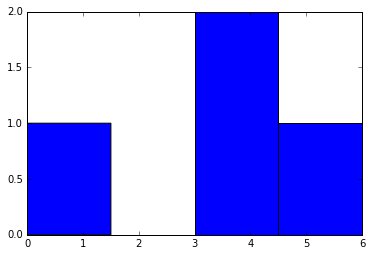

In [58]:
plt.hist(zz, bins='auto')
plt.show()

## We expect 1 zero, 2 threes, 1 six

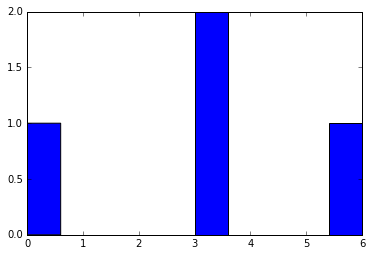

In [59]:
plt.hist(zz, bins = 10)
plt.show()

[ 0.25  0.5   0.25  0.  ]


<function matplotlib.pyplot.show>

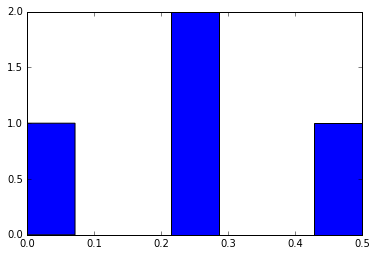

In [102]:
## Histogram Normalization
'''zhisteq = zz
zz.astype(float)
i=0
while i<7:
    zhisteq[i] = (zz[i]/histsum)
    i+=1
zhisteq.astype(float)
print zhisteq '''

zhistnorm = zz*1.0/sum(zz)
print zhistnorm

plt.hist(zhistnorm, bins = 7)
plt.show

Let's pretend Z is a very simple image

In [93]:
import math

## Reminder of Z's values
print z

# Number of pixels
pixels = len(z) * len(z[0])
print "The number of pixels is {}".format(pixels)
## The output should be 4 since there are 4 numbers in this array

##Flatten method doesn't work because of tuple conversion later on
'''# Now we flatten Z
zz = z.reshape(-1)'''


# Initialize histogram and CDF
hist = {}
cdf = {}
norm_cdf = {}
## The range value should be be adjusted to the bin number
### In our case the range and bin number is obviously 10 
### since we generated numbers 1-10
BINS = 10

for i in range(BINS):
    hist[i] = 0
    cdf[i] = 0
    norm_cdf[i] = 0

# Create histogram


for row in z:
    for val in row:
        hist[val] += 1

'''
for val in zz:
    hist[val] += 1
'''    


# Create cdf
for i in range(BINS):
    for j in range(i+1):
        cdf[i] += hist[j]
    norm_cdf[i] = int(math.floor(float(cdf[i]-1)/63*BINS))
    
print "The histogram values are {}".format(hist)
print "The cdf values are {}".format(cdf)
print "The normalized cdf values are {}".format(norm_cdf)


[[3 6]
 [3 0]]
The number of pixels is 4
The histogram values are {0: 1, 1: 0, 2: 0, 3: 2, 4: 0, 5: 0, 6: 1, 7: 0, 8: 0, 9: 0}
The cdf values are {0: 1, 1: 1, 2: 1, 3: 3, 4: 3, 5: 3, 6: 4, 7: 4, 8: 4, 9: 4}
The normalized cdf values are {0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0}


This matches our constructed histogram so we can proceed to create a new histogram and construct the equalized one

In [94]:
newimg = np.empty(z.shape)
## This should be the same exact dimensions as the original array
print newimg 
print z.shape

## set x_length to the first number, y_length to the second
x_length = z.shape[0]
y_length = z.shape[1]

print x_length, y_length

[[ 0.  0.]
 [ 0.  0.]]
(2, 2)
2 2


In [95]:
for i in range(x_length):
    for j in range(y_length):
        newimg[i][j] = norm_cdf[ z[i][j] ]

print newimg

[[ 0.  0.]
 [ 0.  0.]]


This probably didn't work because of the tiny size of the array, let's try something more established

[[ 52  55  61  66  70  61  64  73]
 [ 63  59  55  90 109  85  69  72]
 [ 62  59  68 113 144 104  66  73]
 [ 63  58  71 122 154 106  70  69]
 [ 67  61  68 104 126  88  68  70]
 [ 79  65  60  70  77  68  58  75]
 [ 85  71  64  59  55  61  65  83]
 [ 87  79  69  68  65  76  78  94]]
 
[52 55 61 66 70 61 64 73]
[ 63  59  55  90 109  85  69  72]
 
[ 52  55  61  66  70  61  64  73  63  59  55  90 109  85  69  72  62  59
  68 113 144 104  66  73  63  58  71 122 154 106  70  69  67  61  68 104
 126  88  68  70  79  65  60  70  77  68  58  75  85  71  64  59  55  61
  65  83  87  79  69  68  65  76  78  94]
4869
 


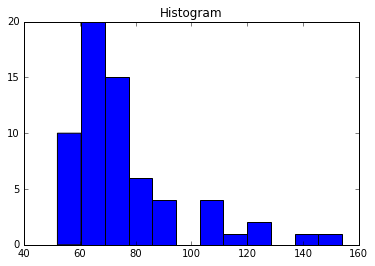

 
[ 0.01067981  0.01129595  0.01252824  0.01355514  0.01437667  0.01252824
  0.01314438  0.01499281  0.012939    0.01211748  0.01129595  0.01848429
  0.02238653  0.01745738  0.01417129  0.01478743  0.01273362  0.01211748
  0.01396591  0.02320805  0.02957486  0.02135962  0.01355514  0.01499281
  0.012939    0.0119121   0.01458205  0.02505648  0.03162867  0.02177038
  0.01437667  0.01417129  0.01376053  0.01252824  0.01396591  0.02135962
  0.025878    0.01807353  0.01396591  0.01437667  0.0162251   0.01334976
  0.01232286  0.01437667  0.01581434  0.01396591  0.0119121   0.01540357
  0.01745738  0.01458205  0.01314438  0.01211748  0.01129595  0.01252824
  0.01334976  0.01704662  0.01786815  0.0162251   0.01417129  0.01396591
  0.01334976  0.01560895  0.01601972  0.01930581]


<function matplotlib.pyplot.show>

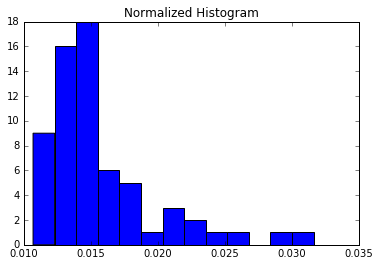

In [5]:
img = [
    [52, 55, 61,  66,  70,  61, 64, 73],
    [63, 59, 55,  90, 109,  85, 69, 72],
    [62, 59, 68, 113, 144, 104, 66, 73],
    [63, 58, 71, 122, 154, 106, 70, 69],
    [67, 61, 68, 104, 126,  88, 68, 70],
    [79, 65, 60,  70,  77,  68, 58, 75],
    [85, 71, 64,  59,  55,  61, 65, 83],
    [87, 79, 69,  68,  65,  76, 78, 94]
]

img = np.asarray(img)
print img

print " "

print img[0]
print img[1]

print " "

imgflat = img.reshape(-1)
print imgflat
print imgflat.sum()

print " "
fig = plt.hist(imgflat, bins='auto')
plt.title('Histogram')
plt.show()

print " "

imgnorm = imgflat*1.0/sum(imgflat)
print imgnorm

fig = plt.hist(imgnorm, bins = 'auto')
plt.title('Normalized Histogram')
plt.show


In [6]:
import math

## Reminder of Z's values
print img

# Number of pixels
pixels = len(img) * len(img[0])
print "The number of pixels is {}".format(pixels)
## The output should be 4 since there are 4 numbers in this array

##Flatten method doesn't work because of tuple conversion later on
'''# Now we flatten Z
zz = z.reshape(-1)'''


# Initialize histogram and CDF
hist = {}
cdf = {}
norm_cdf = {}
## The range value should be be adjusted to the bin number

BINS = 255

for i in range(BINS):
    hist[i] = 0
    cdf[i] = 0
    norm_cdf[i] = 0

# Create histogram


for row in img:
    for val in row:
        hist[val] += 1

'''
for val in zz:
    hist[val] += 1
'''    


# Create cdf
for i in range(BINS):
    for j in range(i+1):
        cdf[i] += hist[j]
    norm_cdf[i] = int(math.floor(float(cdf[i]-1)/63*BINS))
    
print "The histogram values are {}".format(hist)
print "The cdf values are {}".format(cdf)
print "The normalized cdf values are {}".format(norm_cdf)

[[ 52  55  61  66  70  61  64  73]
 [ 63  59  55  90 109  85  69  72]
 [ 62  59  68 113 144 104  66  73]
 [ 63  58  71 122 154 106  70  69]
 [ 67  61  68 104 126  88  68  70]
 [ 79  65  60  70  77  68  58  75]
 [ 85  71  64  59  55  61  65  83]
 [ 87  79  69  68  65  76  78  94]]
The number of pixels is 64
The histogram values are {0: 0, 1: 0, 2: 0, 3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0, 10: 0, 11: 0, 12: 0, 13: 0, 14: 0, 15: 0, 16: 0, 17: 0, 18: 0, 19: 0, 20: 0, 21: 0, 22: 0, 23: 0, 24: 0, 25: 0, 26: 0, 27: 0, 28: 0, 29: 0, 30: 0, 31: 0, 32: 0, 33: 0, 34: 0, 35: 0, 36: 0, 37: 0, 38: 0, 39: 0, 40: 0, 41: 0, 42: 0, 43: 0, 44: 0, 45: 0, 46: 0, 47: 0, 48: 0, 49: 0, 50: 0, 51: 0, 52: 1, 53: 0, 54: 0, 55: 3, 56: 0, 57: 0, 58: 2, 59: 3, 60: 1, 61: 4, 62: 1, 63: 2, 64: 2, 65: 3, 66: 2, 67: 1, 68: 5, 69: 3, 70: 4, 71: 2, 72: 1, 73: 2, 74: 0, 75: 1, 76: 1, 77: 1, 78: 1, 79: 2, 80: 0, 81: 0, 82: 0, 83: 1, 84: 0, 85: 2, 86: 0, 87: 1, 88: 1, 89: 0, 90: 1, 91: 0, 92: 0, 93: 0, 94: 1, 95: 0, 96: 

[[ 0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.]]
(8, 8)
8 8
[[   0.   12.   52.   93.  145.   52.   72.  165.]
 [  64.   32.   12.  214.  234.  202.  129.  157.]
 [  56.   32.  117.  238.  250.  226.   93.  165.]
 [  64.   20.  153.  242.  255.  230.  145.  129.]
 [  97.   52.  117.  226.  246.  210.  117.  145.]
 [ 190.   85.   36.  145.  178.  117.   20.  170.]
 [ 202.  153.   72.   32.   12.   52.   85.  194.]
 [ 206.  190.  129.  117.   85.  174.  182.  218.]]


<function matplotlib.pyplot.show>

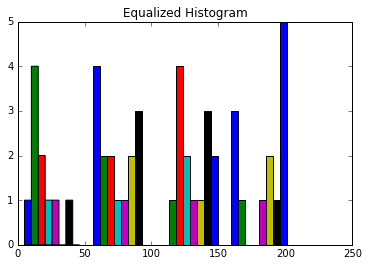

In [8]:
newimg = np.empty(img.shape)
## This should be the same exact dimensions as the original array
print newimg 
print img.shape

## set x_length to the first number, y_length to the second
x_length = img.shape[0]
y_length = img.shape[1]

print x_length, y_length

for i in range(x_length):
    for j in range(y_length):
        newimg[i][j] = norm_cdf[ img[i][j] ]

print newimg
fig = plt.hist(newimg, bins = 'auto')
plt.title('Equalized Histogram')
plt.show

## This is wrong

In [12]:
for i in range(8):
    for j in range(8):
        newimg[i][j] = norm_cdf[ img[i][j] ]

print '+-------+-----------+-----+----------------+'
print '| %5s | %9s | %3s | %14s |' % ('Value', 'Histogram', 'cdf', 'Normalized cdf')
print '+-------+-----------+-----+----------------+'
for i in range(255):
    if hist[i] == 0: continue
    print '| %5s | %9s | %3s | %14s |' % (i, hist[i], cdf[i], norm_cdf[i])
print '+-------+-----------+-----+----------------+'

print ''
print 'Original subimage:'
print ''
for i in range(8):
    print ('%4d'*8) % tuple(img[i])

print ''
print ''
print 'Equalized subimage:'
print ''

for i in range(8):
    print ('%4d'*8) % tuple(newimg[i])

+-------+-----------+-----+----------------+
| Value | Histogram | cdf | Normalized cdf |
+-------+-----------+-----+----------------+
|    52 |         1 |   1 |              0 |
|    55 |         3 |   4 |             12 |
|    58 |         2 |   6 |             20 |
|    59 |         3 |   9 |             32 |
|    60 |         1 |  10 |             36 |
|    61 |         4 |  14 |             52 |
|    62 |         1 |  15 |             56 |
|    63 |         2 |  17 |             64 |
|    64 |         2 |  19 |             72 |
|    65 |         3 |  22 |             85 |
|    66 |         2 |  24 |             93 |
|    67 |         1 |  25 |             97 |
|    68 |         5 |  30 |            117 |
|    69 |         3 |  33 |            129 |
|    70 |         4 |  37 |            145 |
|    71 |         2 |  39 |            153 |
|    72 |         1 |  40 |            157 |
|    73 |         2 |  42 |            165 |
|    75 |         1 |  43 |            170 |
|    76 | 

[[   0.   12.   52.   93.  145.   52.   72.  165.]
 [  64.   32.   12.  214.  234.  202.  129.  157.]
 [  56.   32.  117.  238.  250.  226.   93.  165.]
 [  64.   20.  153.  242.  255.  230.  145.  129.]
 [  97.   52.  117.  226.  246.  210.  117.  145.]
 [ 190.   85.   36.  145.  178.  117.   20.  170.]
 [ 202.  153.   72.   32.   12.   52.   85.  194.]
 [ 206.  190.  129.  117.   85.  174.  182.  218.]]


ValueError: invalid literal for float(): 0  12  52  93 145  52  72 165

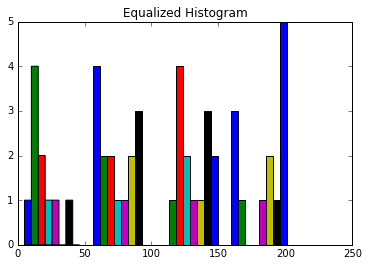

In [13]:
for i in range(x_length):
    for j in range(y_length):
        newimg[i][j] = norm_cdf[ img[i][j] ]

print newimg
fig = plt.hist(newimg, bins = 'auto')
plt.title('Equalized Histogram')
plt.show

histeqimg = np.empty(img.shape)
for i in range(8):
    histeqimg[i] = ('%4d'*8) % tuple(newimg[i])
    
    
print histeqimg
fig = plt.hist(histeqimg, bins = 'auto')
plt.title('Equalized Histogram 2')
plt.show

In [17]:
print(repr(histeqimg))
histeqimg.append(line.strip('\n').strip('\t').split(' ').pop(7))  
### Errors caused by massive number of zeros?

array([[  9.76118064e-313,   2.37151510e-322,   0.00000000e+000,
          0.00000000e+000,   0.00000000e+000,   0.00000000e+000,
          0.00000000e+000,   0.00000000e+000],
       [  0.00000000e+000,   0.00000000e+000,   0.00000000e+000,
          0.00000000e+000,   0.00000000e+000,   0.00000000e+000,
          0.00000000e+000,   0.00000000e+000],
       [  9.76118064e-313,   2.37151510e-322,   0.00000000e+000,
          0.00000000e+000,   0.00000000e+000,   0.00000000e+000,
          0.00000000e+000,   0.00000000e+000],
       [  0.00000000e+000,   0.00000000e+000,   0.00000000e+000,
          0.00000000e+000,   0.00000000e+000,   0.00000000e+000,
          0.00000000e+000,   0.00000000e+000],
       [  9.76118064e-313,   2.37151510e-322,   0.00000000e+000,
          0.00000000e+000,   0.00000000e+000,   0.00000000e+000,
          0.00000000e+000,   0.00000000e+000],
       [  0.00000000e+000,   0.00000000e+000,   0.00000000e+000,
          0.00000000e+000,   0.00000000e+000,   0.

AttributeError: 'numpy.ndarray' object has no attribute 'append'


Original subimage:

  52  55  61  66  70  61  64  73
  63  59  55  90 109  85  69  72
  62  59  68 113 144 104  66  73
  63  58  71 122 154 106  70  69
  67  61  68 104 126  88  68  70
  79  65  60  70  77  68  58  75
  85  71  64  59  55  61  65  83
  87  79  69  68  65  76  78  94

[[ 52  55  61  66  70  61  64  73]
 [ 63  59  55  90 109  85  69  72]
 [ 62  59  68 113 144 104  66  73]
 [ 63  58  71 122 154 106  70  69]
 [ 67  61  68 104 126  88  68  70]
 [ 79  65  60  70  77  68  58  75]
 [ 85  71  64  59  55  61  65  83]
 [ 87  79  69  68  65  76  78  94]]
 


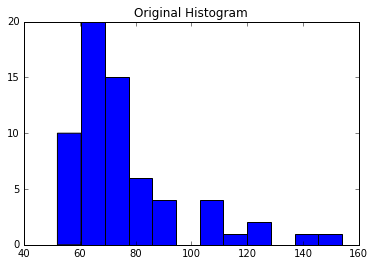



Equalized subimage:

   0  12  52  93 145  52  72 165
  64  32  12 214 234 202 129 157
  56  32 117 238 250 226  93 165
  64  20 153 242 255 230 145 129
  97  52 117 226 246 210 117 145
 190  85  36 145 178 117  20 170
 202 153  72  32  12  52  85 194
 206 190 129 117  85 174 182 218

[[   0.   12.   52.   93.  145.   52.   72.  165.]
 [  64.   32.   12.  214.  234.  202.  129.  157.]
 [  56.   32.  117.  238.  250.  226.   93.  165.]
 [  64.   20.  153.  242.  255.  230.  145.  129.]
 [  97.   52.  117.  226.  246.  210.  117.  145.]
 [ 190.   85.   36.  145.  178.  117.   20.  170.]
 [ 202.  153.   72.   32.   12.   52.   85.  194.]
 [ 206.  190.  129.  117.   85.  174.  182.  218.]]


<function matplotlib.pyplot.show>

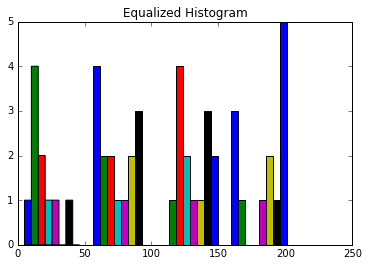

In [35]:
print ''
print 'Original subimage:'
print ''
for i in range(8):
    print ('%4d'*8) % tuple(img[i])
print ''
imgflat = img.reshape(-1)
print img

print " "
fig = plt.hist(imgflat, bins='auto')
plt.title('Original Histogram')
plt.show()

print ''
print ''
print 'Equalized subimage:'
print ''

for i in range(8):
    print ('%4d'*8) % tuple(newimg[i])

for i in range(x_length):
    for j in range(y_length):
        newimg[i][j] = norm_cdf[ img[i][j] ]
print ''
print newimg
fig = plt.hist(newimg, bins = 'auto')
plt.title('Equalized Histogram')
plt.show

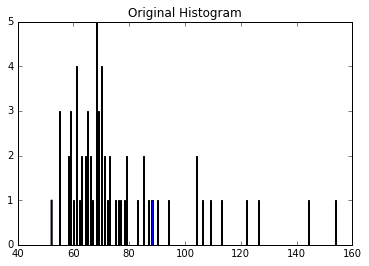

In [47]:
fig = plt.hist(imgflat, bins=255)
plt.title('Original Histogram')
plt.show()

<function matplotlib.pyplot.show>

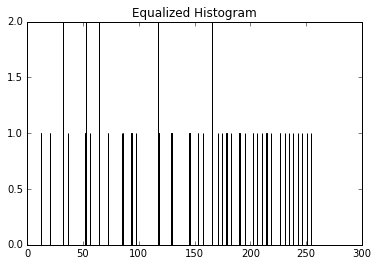

In [48]:
fig = plt.hist(newimg, bins = 255)
plt.title('Equalized Histogram')
plt.show

In [40]:
print img
print ''
print newimg
print ''

flatimg = img.reshape(-1)
flattenedimg, bin_edges1 = np.histogram(flatimg)
print flatimg
print flattenedimg
print ''

flatnewimg = newimg.reshape(-1)
flattenednewimg, bin_edges2 = np.histogram(flatnewimg)
print flatnewimg
print flattenednewimg
print ''


[[ 52  55  61  66  70  61  64  73]
 [ 63  59  55  90 109  85  69  72]
 [ 62  59  68 113 144 104  66  73]
 [ 63  58  71 122 154 106  70  69]
 [ 67  61  68 104 126  88  68  70]
 [ 79  65  60  70  77  68  58  75]
 [ 85  71  64  59  55  61  65  83]
 [ 87  79  69  68  65  76  78  94]]

[[   0.   12.   52.   93.  145.   52.   72.  165.]
 [  64.   32.   12.  214.  234.  202.  129.  157.]
 [  56.   32.  117.  238.  250.  226.   93.  165.]
 [  64.   20.  153.  242.  255.  230.  145.  129.]
 [  97.   52.  117.  226.  246.  210.  117.  145.]
 [ 190.   85.   36.  145.  178.  117.   20.  170.]
 [ 202.  153.   72.   32.   12.   52.   85.  194.]
 [ 206.  190.  129.  117.   85.  174.  182.  218.]]

[ 52  55  61  66  70  61  64  73  63  59  55  90 109  85  69  72  62  59
  68 113 144 104  66  73  63  58  71 122 154 106  70  69  67  61  68 104
 126  88  68  70  79  65  60  70  77  68  58  75  85  71  64  59  55  61
  65  83  87  79  69  68  65  76  78  94]
[15 25  8  6  1  5  1  1  0  2]

[   0.   12.  

<function matplotlib.pyplot.show>

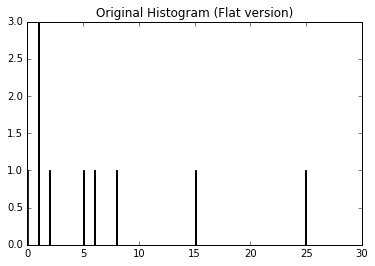

In [46]:
fig = plt.hist(flattenedimg, bins = 255)
plt.title('Original Histogram (Flat version)')
plt.show

<function matplotlib.pyplot.show>

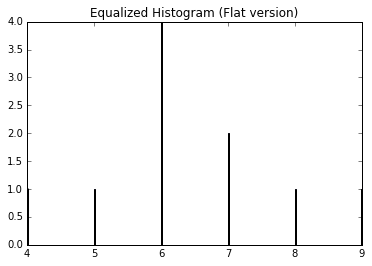

In [45]:
fig = plt.hist(flattenednewimg, bins = 255)
plt.title('Equalized Histogram (Flat version)')
plt.show